<a href="https://colab.research.google.com/github/fpmBelkov/Algorithms/blob/master/gc_epam_algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# (1)
def rev(a):
    b = 0
    while (a != 0):
        b = b*10 + a % 10
        a //= 10
    return b

In [2]:
# Проверим изменяемость чисел
b = 0
a = 128
print("id(a) = ",id(a))
print("id(b) = ",id(b))
print("~~~~~~~~~~~~~~~~~~~~~~~~")
b += b*10 + a % 10
print("id(a) = ",id(a))
print("id(b) = ",id(b))
a //= 10
print("~~~~~~~~~~~~~~~~~~~~~~~~")
print("id(a) = ",id(a))

id(a) =  94144868342240
id(b) =  94144868338144
~~~~~~~~~~~~~~~~~~~~~~~~
id(a) =  94144868342240
id(b) =  94144868338400
~~~~~~~~~~~~~~~~~~~~~~~~
id(a) =  94144868338528


### Анализ алгоритма (1)
Пусть на вход поступает число $a$\
Учтём что Python переводит числа в систему счисления по модую $2^{30}$. Т.е. числа из $[1,2^{30}]$ хранятся как одна ячейка, а чиcла $> 2^{30}$ хранятся как массив чисел (коэффициентов $c_i$ в линейной комбинации $\sum_{i = 0}^{n - 1}c_i*2^{30*i}, n - $кол-во разрядов числа в $\mathbb{Z}_{2^{30}}$$,0 \leq c_i < 2^{30}$)\
Оценим $n$ по значению $a$:\
$a \in [10^{k-1}, 10^k)$, $k$ - кол-во разрядов в десятичной системе $\Rightarrow\ k = \lfloor \log_{10}{a} \rfloor + 1$ \
имеем $n = \lfloor k\log_{2^{30}}{10}\rfloor + 1 = \lfloor\frac{k\log_{2}{10}}{30}\rfloor + 1 = \lfloor\frac{\log_{10}{a}\log_{2}{10}}{30}\rfloor + 1 \sim C*\log_{10}{a}$\
Одним из важных моментов выполнения арифметических операций используя длинную арифметику в Python является создание копии "числа" вследствие их неизенямости\
Т.е. в итоге получаем:\
$O(\log_{10}{a})$ итераций цикла $while$ и при выполнении каждой из них копирование массива из $O(\log_{10}{a})$ элементов $\Rightarrow$ временная сложность $O(\log_{10}^2{a})$\
Таким образом время работы алоритма $\begin{equation}
    \begin{cases}
      O(\log_{10}{a}), a \leq 2^{30} (*)\\
      O(\log_{10}^2{a}), a > 2^{30}
    \end{cases}\,
\end{equation}$\
И сложность по памяти:\
$\begin{equation}
    \begin{cases}
      O(\log_{10}{a}), a \leq 2^{30}\\
      O(\log_{10}^2{a}), a > 2^{30}
    \end{cases}\,
\end{equation}$\
В $(*)$ без квадрата т.к. копия одной ячейки памяти выполняется за $O(const)$

In [3]:
#(2)
def rev_str(a):
    return int(str(a)[::-1])

In [4]:
# Проверим изменяется строк
s = str(123456)
id1 = id(s)
s += '78'
id2 = id(s)
print("mutable from str(int) -",id1 == id2)

id3 = id(s[::-1])
print("mutable from s[::-1] -",id1 == id3)

mutable from str(int) - True
mutable from s[::-1] - False


### Анализ алгоритма (2)
Тут я буду опираться на [source code](https://github.com/python/cpython/blob/943e77d42d3f84b581f32c05f1fc8c05366b8ed3/Objects/longobject.c#L1581)\
Согласно исходникам, $str(int)$ выполняется за $O(k^2)$, где $k$ - кол-во цифр в $a_{10}\ \Rightarrow$ выполняется за $O(\log_{10}^2{a})$\
Происходит это потому что алгоритм из Кнута (TAOCP V.2) на который ссылаются в источниках: 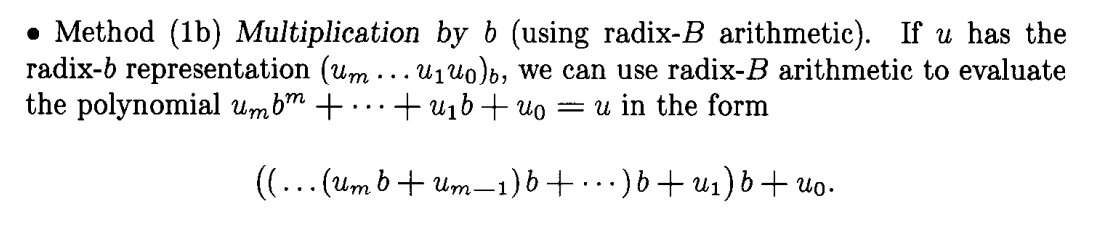 по сути является [методом Хорнера](https://en.wikipedia.org/wiki/Horner%27s_method) имеющим асимпотику $O(m^2) = O(\log_{10}^2{a})$ (тут $m = k$)\
Слайсинг вида $str[::-1]$ создаёт копию строки $\Rightarrow$ требует $O(\log_{10}{a})$ операций и $O(\log_{10}{a})$ доп. памяти\
$int(str)$ выполняется за $O(\log_{10}{a})$\
В итоге получаем временную сложность $O(\log_{10}^2{a})$\
И сложность по памяти $O(\log_{10}{a})$


### Тесты
Числа для тестов подбирались с минимальным кол-вом нулей на конце в своей десятичной записи.Числа такого вида берём чтобы получать более общий случай (т.к. например при ревёрсе числа 123400000000 получим 4321 и возможно получим более высокую скорость выполнения алгоритмов) 

Создадим массив с массивами чисел $[n,n^{100}], n = 11,..,19,21$

In [5]:
args = [] 
for i in range(1,11):
    if i == 10:
        args.append([21**x for x in range(1,101)])
    else:
        args.append([(10 + i)**x for x in range(1,101)])

In [6]:
 #args

С помощью $𝑡𝑖𝑚𝑒$ замерим суммарное время выполнения каждого алгоритмоа за  $𝑁$ прогонок массива

In [7]:
import time

In [8]:
def time_of_rev(a):
    start = time.time()
    x = rev(a)
    end = time.time()
    return (end - start)*1000

def time_of_rev_str(a):
    start = time.time()
    x = rev_str(a)
    end = time.time()
    return (end - start)*1000

Функциией measure(args,N) будем считать кол-во случаев из $N$ прогонок, когда время выполнения $(1) \geq (2)$ 

In [9]:
def measure(args, N):
    count = 0
    for i in range(N):
        T1,T2 = 0,0
        for a in args:
            T1 += time_of_rev(a)
            T2 += time_of_rev_str(a)
        if T1 >= T2:
            count += 1
    return count

In [10]:
N = 1000

In [11]:
C = []
for arg in args:
    C.append(measure(arg,N))
    print(C[-1])
    #sum(C)
#S.append(C)

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000


Тут Jupyter Notebook давал немного другие результаты: rev_str(a) был быстрее чем rev(a) в среднем в $\sim950 - 990$ случаях из $1000$.
А вообзще на выборке чисел как $\leq 2^{30}$, так и $\geq 2^{30}$, алгоритм $(2)$ показывает себя значительно лучше чем $(1)$\
Окончательно убедимся в этом непосредственно замерив время работы алгоритмов и построим соответвующие графики

In [12]:
dT = []
rT = []
tr = []
trs = []
for arg in args:
    for a in arg:
        tr.append(time_of_rev(a))
        trs.append(time_of_rev_str(a))
        dT.append(tr[-1] - trs[-1])
        rT.append(tr[-1]/trs[-1])

In [13]:
mean_rT = sum(rT)/len(rT)
min_rT = min(rT)
max_rT = max(rT)
print('mean_rT = ', mean_rT)
print('min_rT = ', min_rT)
print('max_rT = ', max_rT)
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
mean_dT = sum(dT)/len(dT)
min_dT = min(dT)
max_dT = max(dT)
print('mean_dT = ', mean_dT)
print('min_dT = ', min_dT)
print('max_dT = ', max_dT)
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
mean_tr = sum(tr)/len(tr)
min_tr = min(tr)
max_tr = max(tr)
print('mean_tr = ',mean_tr)
print('min_tr = ',min_tr)
print('max_tr = ',max_tr)
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
mean_trs = sum(trs)/len(trs)
min_trs = min(trs)
max_trs = max(trs)
print('mean_trs = ',mean_trs)
print('min_trs = ',min_trs)
print('max_trs = ',max_trs)

mean_rT =  15.338129090410295
min_rT =  0.0625
max_rT =  100.375
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
mean_dT =  0.024082422256469727
min_dT =  -0.01430511474609375
max_dT =  0.5686283111572266
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
mean_tr =  0.025695085525512695
min_tr =  0.000476837158203125
max_tr =  0.5743503570556641
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
mean_trs =  0.0016126632690429688
min_trs =  0.0007152557373046875
max_trs =  0.03790855407714844


In [14]:
from matplotlib import pyplot as plt

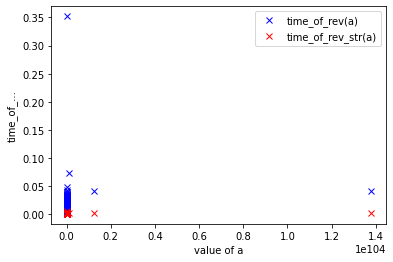

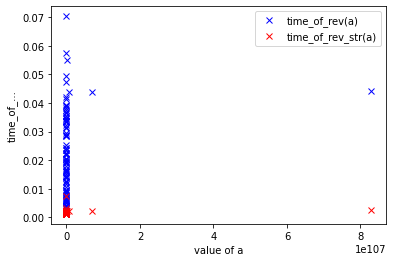

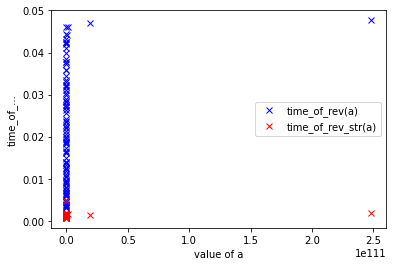

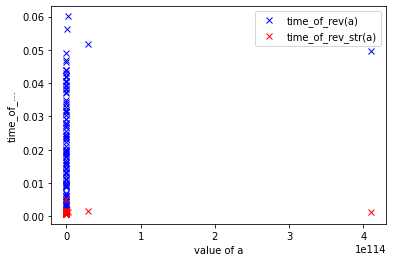

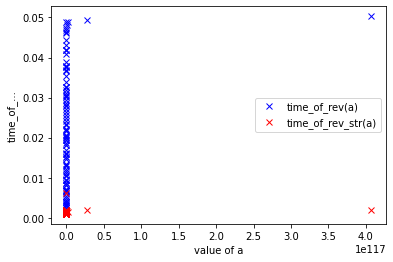

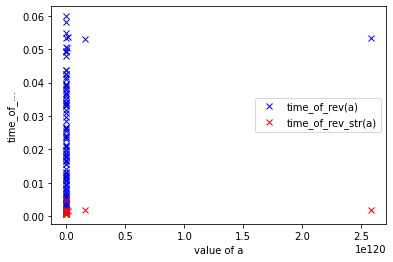

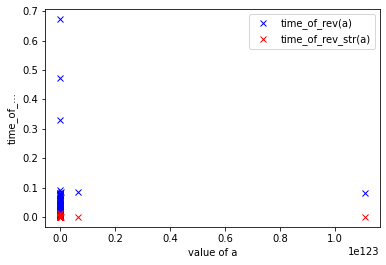

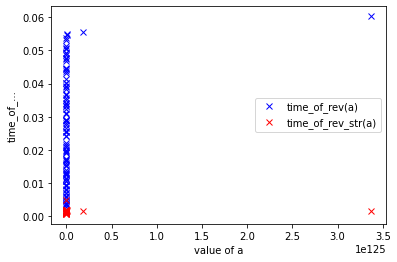

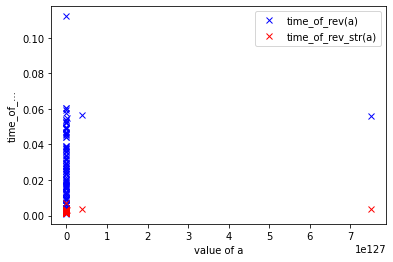

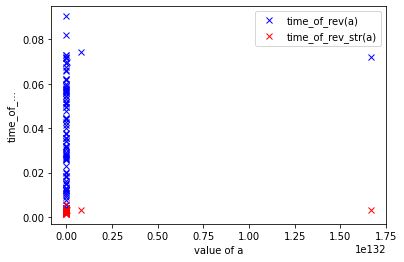

In [15]:
for arg in args:
    plt.plot(arg,[time_of_rev(a) for a in arg], 'bx',label = 'time_of_rev(a)')
    plt.plot(arg,[time_of_rev_str(a) for a in arg], 'rx',label = 'time_of_rev_str(a)')
    plt.xlabel('value of a')
    plt.ylabel('time_of_...')
    plt.legend()
    plt.show()

Получаем, что на такой выборке входных данных rev_str(a) быстрее rev(a) в $\approx 14 $ раз

###=============================================================================
Проведём тесты для чисел $\leq 2^{30}$

In [16]:
args_small = []
for i in range(2,20):
  args_small.append([i])
  #print(args_small[-1][-1])
  if i == 10:
      pass
  else:
      while (args_small[-1][-1] < 2**29):
          args_small[-1].append(args_small[-1][-1]*i)


In [17]:
# args_small

In [18]:
N = 1000

In [19]:
C_small = []

num = 2
for a in args_small:
    C_small.append(measure(a,N))
    print(C_small[-1], " for num = ",num)
    num += 1

985  for num =  2
992  for num =  3
998  for num =  4
992  for num =  5
975  for num =  6
995  for num =  7
992  for num =  8
990  for num =  9
440  for num =  10
995  for num =  11
993  for num =  12
991  for num =  13
990  for num =  14
988  for num =  15
986  for num =  16
988  for num =  17
989  for num =  18
993  for num =  19


Здесь хоть и rev_str(a) всё-равно лидирует в абсолютном большинстве случаев, но rev(a) начинает показывать результаты в некторых случаях лучше чем rev_str(a)

In [20]:
dT_small = []
rT_small = []
tr_small = []
trs_small = []

for arg in args_small:
    for a in arg:
        tr_small.append(time_of_rev(a))
        trs_small.append(time_of_rev_str(a))
        dT_small.append(tr_small[-1] - trs_small[-1])
        rT_small.append(tr_small[-1]/trs_small[-1])

In [21]:
for i in range(len(dT_small)):
    print(dT_small[i]," | ",rT_small[i], "  ||  ", "time_of_rev(a): ",tr_small[i] ," , ","time_of_rev_str(a): ",trs_small[i])

-0.0016689300537109375  |  0.6818181818181818   ||   time_of_rev(a):  0.0035762786865234375  ,  time_of_rev_str(a):  0.005245208740234375
-0.0002384185791015625  |  0.75   ||   time_of_rev(a):  0.0007152557373046875  ,  time_of_rev_str(a):  0.00095367431640625
-0.0002384185791015625  |  0.6666666666666666   ||   time_of_rev(a):  0.000476837158203125  ,  time_of_rev_str(a):  0.0007152557373046875
-0.0002384185791015625  |  0.75   ||   time_of_rev(a):  0.0007152557373046875  ,  time_of_rev_str(a):  0.00095367431640625
-0.0002384185791015625  |  0.75   ||   time_of_rev(a):  0.0007152557373046875  ,  time_of_rev_str(a):  0.00095367431640625
-0.0002384185791015625  |  0.6666666666666666   ||   time_of_rev(a):  0.000476837158203125  ,  time_of_rev_str(a):  0.0007152557373046875
0.0002384185791015625  |  1.3333333333333333   ||   time_of_rev(a):  0.00095367431640625  ,  time_of_rev_str(a):  0.0007152557373046875
0.0  |  1.0   ||   time_of_rev(a):  0.0007152557373046875  ,  time_of_rev_str(a):

In [22]:
mean_rT_small = sum(rT_small)/len(rT_small)
min_rT_small = min(rT_small)
max_rT_small = max(rT_small)
print('mean_rT_small = ', mean_rT_small)
print('min_rT_small = ', min_rT_small)
print('max_rT_small = ', max_rT_small)
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
mean_dT_small = sum(dT_small)/len(dT_small)
min_dT_small = min(dT_small)
max_dT_small = max(dT_small)
print('mean_dT_small = ', mean_dT_small)
print('min_dT_small = ', min_dT_small)
print('max_dT_small = ', max_dT_small)
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
mean_tr_small = sum(tr_small)/len(tr_small)
min_tr_small = min(tr_small)
max_tr_small = max(tr)
print('mean_tr_small = ',mean_tr_small)
print('min_tr_small = ',min_tr_small)
print('max_tr_small = ',max_tr_small)
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
mean_trs_small = sum(trs_small)/len(trs_small)
min_trs_small = min(trs_small)
max_trs_small = max(trs_small)
print('mean_trs_small = ',mean_trs_small)
print('min_trs_small = ',min_trs_small)
print('max_trs_small = ',max_trs_small)

mean_rT_small =  1.7872080176767673
min_rT_small =  0.045454545454545456
max_rT_small =  7.25
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
mean_dT_small =  0.0005004306634267172
min_dT_small =  -0.015020370483398438
max_dT_small =  0.0059604644775390625
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
mean_tr_small =  0.001372148593266805
min_tr_small =  0.000476837158203125
max_tr_small =  0.5743503570556641
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
mean_trs_small =  0.0008717179298400879
min_trs_small =  0.000476837158203125
max_trs_small =  0.015735626220703125


Построим графики

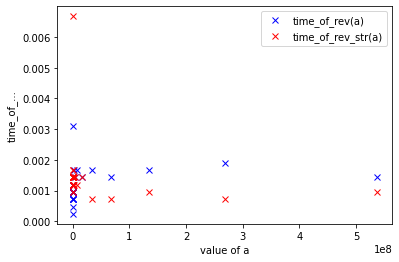

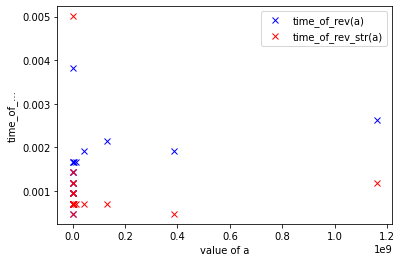

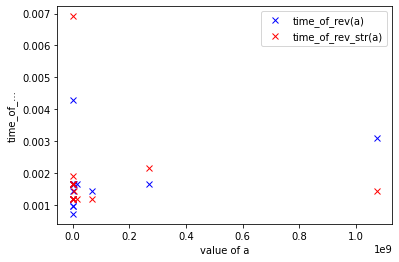

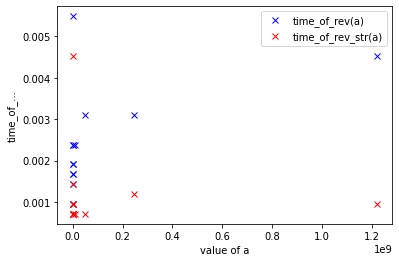

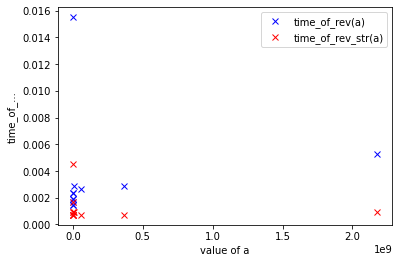

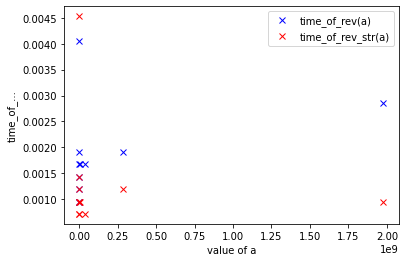

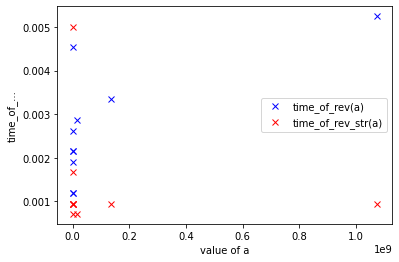

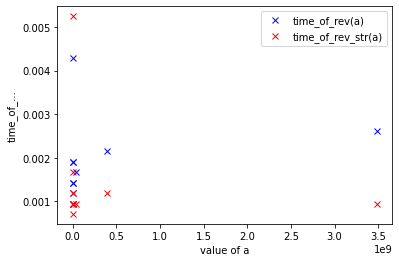

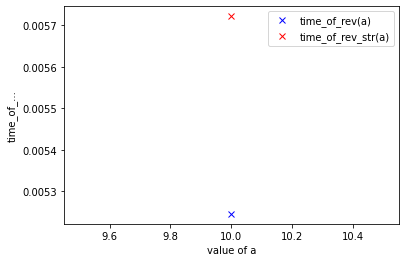

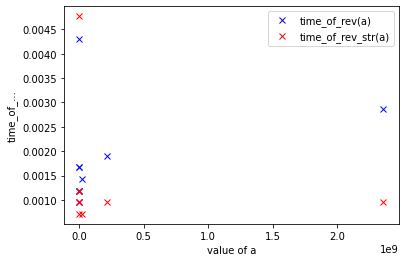

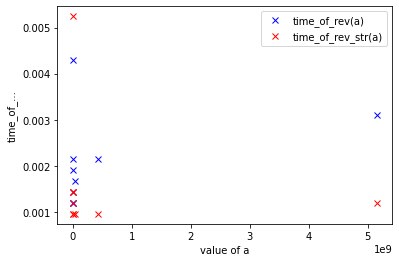

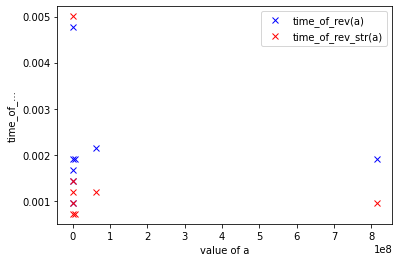

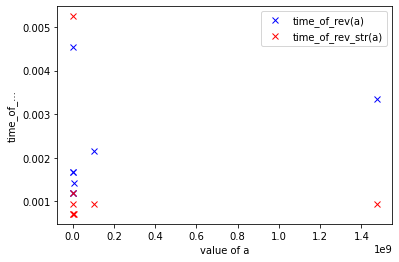

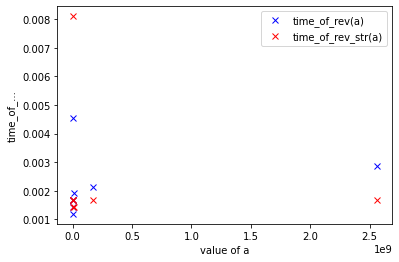

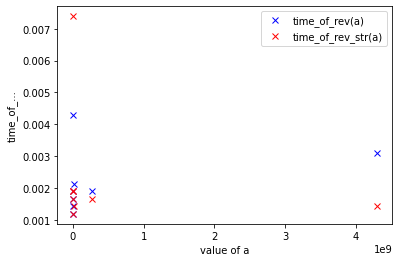

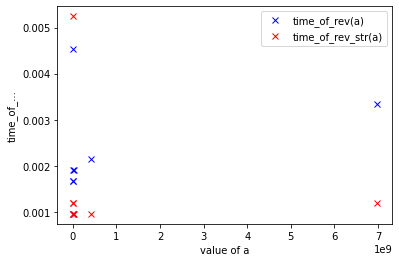

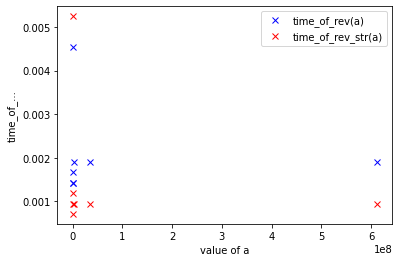

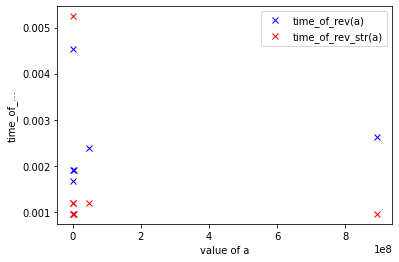

In [23]:
for arg in args_small:
    plt.plot(arg,[time_of_rev(a) for a in arg], 'bx',label = 'time_of_rev(a)')
    plt.plot(arg,[time_of_rev_str(a) for a in arg], 'rx',label = 'time_of_rev_str(a)')
    plt.xlabel('value of a')
    plt.ylabel('time_of_...')
    plt.legend()
    plt.show()

Из графиков и замеров времени работы алгоритмов видно, что rev_str(a) в абсолютном большинстве случаев быстрее чем rev(a). При этом rev_str(a) быстрее rev(a) в $\approx 2$ раза 

###===========================================================================
Сравним скорость алгоритмов на массивах больших (значительно больших чем $2^{30}$) чисел вида $(1111*i)^{1111*i}, i = 1,...,9$\

In [24]:
args_large = []
for i in range(1,10):
    args_large.append([])
    for j in range(1,10):
        args_large[-1].append((1111*i)**(1111*i))

In [25]:
# args_large

Из-за крайне долгих вычислений будем напрямую сравнивать время выполнения алгоритмов\
dT_large[i] - разность времени выполнений $(1)$ и $(2)$\
rT_large[i] - отношение времени выполнений $(1)$ и $(2)$\
tr[i] - время выполнения rev(a)\
trs[i] - время выполнеиня rev_str(a)

In [26]:
tr_large = []
trs_large = []
dT_large = []
rT_large = []
for a_l in args_large:
    for a in a_l:
        tr_large.append(time_of_rev(a))
        trs_large.append(time_of_rev_str(a))
        dT_large.append(tr_large[-1] - trs_large[-1])
        rT_large.append(tr_large[-1]/trs_large[-1])
        #print(dT_large[-1]," | ",rT_large[-1], "  ||  ", "time_of_rev(a): ",tr[-1] ," , ","time_of_rev_str(a): ",trs[-1])

In [28]:
for i in range(len(tr_large)):
    print(dT_large[i]," | ",rT_large[i], "  ||  ", "time_of_rev(a): ",tr_large[i] ," , ","time_of_rev_str(a): ",trs_large[i])

25.115251541137695  |  84.60396825396825   ||   time_of_rev(a):  25.415658950805664  ,  time_of_rev_str(a):  0.30040740966796875
21.413087844848633  |  72.8504   ||   time_of_rev(a):  21.711111068725586  ,  time_of_rev_str(a):  0.2980232238769531
22.685527801513672  |  61.527989821882954   ||   time_of_rev(a):  23.060321807861328  ,  time_of_rev_str(a):  0.37479400634765625
21.97575569152832  |  56.39242788461539   ||   time_of_rev(a):  22.37248420715332  ,  time_of_rev_str(a):  0.396728515625
21.2252140045166  |  71.71088165210485   ||   time_of_rev(a):  21.52538299560547  ,  time_of_rev_str(a):  0.3001689910888672
21.55280113220215  |  73.03107569721115   ||   time_of_rev(a):  21.85201644897461  ,  time_of_rev_str(a):  0.29921531677246094
21.238327026367188  |  72.78082191780823   ||   time_of_rev(a):  21.534204483032227  ,  time_of_rev_str(a):  0.29587745666503906
21.064281463623047  |  71.28639618138425   ||   time_of_rev(a):  21.36397361755371  ,  time_of_rev_str(a):  0.2996921539

In [29]:
mean_rT_large = sum(rT_large)/len(rT_large)
min_rT_large = min(rT_large)
max_rT_large = max(rT_large)
print('mean_rT_large = ', mean_rT_large)
print('min_rT_large = ', min_rT_large)
print('max_rT_large = ', max_rT_large)
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
mean_dT_large = sum(dT_large)/len(dT_large)
min_dT_large = min(dT_large)
max_dT_large = max(dT_large)
print('mean_dT_large = ', mean_dT_large)
print('min_dT_large = ', min_dT_large)
print('max_dT_large = ', max_dT_large)
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
mean_tr_large = sum(tr_large)/len(tr_large)
min_tr_large = min(tr_large)
max_tr_large = max(tr_large)
print('mean_tr_large = ',mean_tr_large)
print('min_tr_large = ',min_tr_large)
print('max_tr_large = ',max_tr_large)
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
mean_trs_large = sum(trs_large)/len(trs_large)
min_trs_large = min(trs_large)
max_trs_large = max(trs_large)
print('mean_trs_large = ',mean_trs_large)
print('min_trs_large = ',min_trs_large)
print('max_trs_large = ',max_trs_large)

mean_rT_large =  75.92287445038735
min_rT_large =  56.39242788461539
max_rT_large =  84.60396825396825
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
mean_dT_large =  1059.6358717223745
min_dT_large =  21.064281463623047
max_dT_large =  2903.493881225586
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
mean_tr_large =  1073.6472871568467
min_tr_large =  21.36397361755371
max_tr_large =  2940.8864974975586
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
mean_trs_large =  14.011415434472354
min_trs_large =  0.29587745666503906
max_trs_large =  41.36371612548828


Т.к. использовали числа вида $(1111*i)^{1111*i}$, для удобства построим графики  time_of_rev(a), time_of_rev_str(a) от $i$

In [30]:
args_large_for_plot = [(1111*i)**(1111*i) for i in range(1,10)]

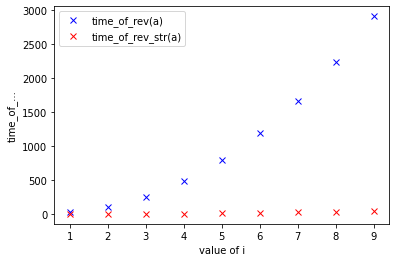

In [31]:
plt.plot([i for i in range(1,10)],[time_of_rev(a) for a in args_large_for_plot],'bx',label = 'time_of_rev(a)')
plt.plot([i for i in range(1,10)],[time_of_rev_str(a) for a in args_large_for_plot],'rx',label = 'time_of_rev_str(a)')
plt.xlabel('value of i')
plt.ylabel('time_of_...')
plt.legend()
plt.show()

Получаем, что rev_str(a) в $\approx 75-78$ раз быстрее чем rev(a) для крайне больших входных данных. И как видно из тестовых output'ов и графика разница во времени выполнения растёт крайне быстро с ростом $i$. Так же стоит обратить внимание на незначительный рост time_of_rev_str(a) по сравнению с time_of_rev(a) относительно крайне быстрого роста величины $(1111*i)^{(1111*i)}, i = 1,...,9$,
Диапазоны изменения и средние значения измерияемых величин:\
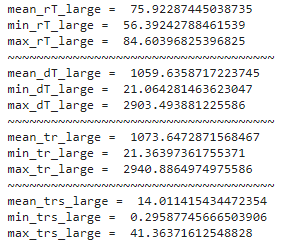

###=============================================================================
Протестируем на рандомных наборах чисел из дипазона $1 \leq a \leq 256$

In [32]:
import random

In [33]:
args_small_rand = []
for i in range(1000):
    args_small_rand.append(random.randint(1, 256))

In [34]:
# args_small_rand

In [35]:
N = 1000

In [36]:
C_small_rand = []

for i in range(100):
    C_small_rand.append(measure(args_small_rand,N))
    #print(C_small_rand[-1])

In [37]:
print("min: ",min(C_small_rand))
print("max: ",max(C_small_rand))
mean_C_small_rand = int(sum(C_small_rand)/len(C_small_rand))
print("mean: ",mean_C_small_rand)

min:  3
max:  26
mean:  14


In [38]:
Tr_small_rand = []
Trs_small_rand = []
dT_small_rand = []
rT_small_rand = []
for a in args_small_rand:
    Tr_small_rand.append(time_of_rev(a))
    Trs_small_rand.append(time_of_rev_str(a))
    dT_small_rand.append(Tr_small_rand[-1] - Trs_small_rand[-1])
    rT_small_rand.append(Tr_small_rand[-1]/Trs_small_rand[-1])
    #print("time_of_rev(a) = ",Tr_small_rand[-1], "  | ", "time_of_rev_str(a) = ",Trs_small_rand[-1])

In [39]:
print(min(dT_small_rand))
print(max(dT_small_rand ))
print(sum(dT_small_rand)/len(dT_small_rand))
print("~~~~~~~~~~~~~~~~~~~~~~~~~")
print(min(rT_small_rand))
print(max(rT_small_rand ))
print(sum(rT_small_rand)/len(rT_small_rand))

-0.01811981201171875
0.03886222839355469
-0.0001804828643798828
~~~~~~~~~~~~~~~~~~~~~~~~~
0.05
21.375
0.9038086973541187


В данном случае rev(a) значительно быстрее rev_str(a). В среднем только в {{mean_C_small_rand}} из $1000$ прогонок массива args_small_rand rev(a) работает медленнее чем rev_str(a).\
Вообще у Python существует некоторая оптимизация для чисел $\in [-5,256]$.\
Они храняться в памяти заранее и при инициализации какой-либо переменной Python указывает на соостветствующую ячейку. Но вообще говоря не очень понятно как это сказывается на скорости алгоритмов помимо избалвения от необзожимости создавать новые объекты при инициализации

In [40]:
args_xsmall_rand = [i for i in range(257)]

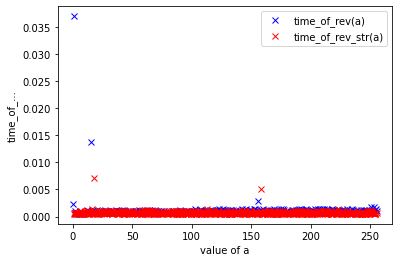

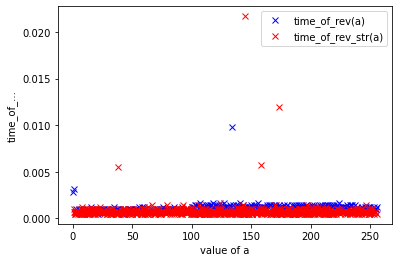

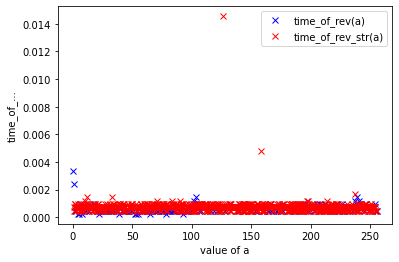

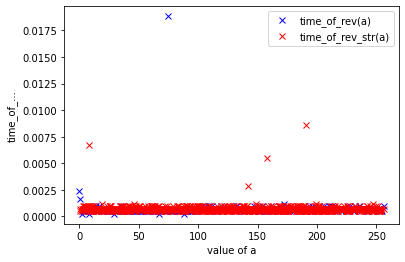

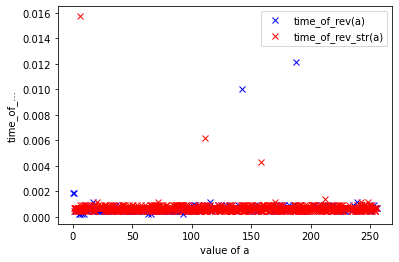

In [41]:
for i in range(5):
    plt.plot(args_xsmall_rand ,[time_of_rev(arg) for arg in args_xsmall_rand ],'bx',label = 'time_of_rev(a)')
    plt.plot(args_small_rand,[time_of_rev_str(arg) for arg in args_small_rand],'rx',label = 'time_of_rev_str(a)')
    plt.xlabel('value of a')
    plt.ylabel('time_of_...')
    plt.legend()
    plt.show()

Вообще говоря по графикам видно, что у алгоритма rev_str(a) чаще случаются т.н. выбросы. 

### Итог
На большой выборке чисел от $1$ до чисел порядка $\sim10^{100}$ rev_str(a) работает быстрее в $\approx 14$ раз чем rev(a) и имеет среднее время выполнения $\approx 0.0014-0.0017$ мс\
На выборке чисел из диапазона классического $int$, т.е. $\leq 2^{30}$ rev_str(a) работает быстрее в $\approx 2$ раза чем rev(a).\
При это среднее время выполнения rev_str(a) $\approx 0.0008-0.001$ мс\
На выборке чисел порядка как минимум $\sim 10^{3000}$ rev_str(a) работает быстрее rev(a) в $\approx 75-78$ раз и имеет среднее время выполнения $\approx 14-17$ мс, при этом время выполнения rev_str(a) с ростом $a$ растёт крайне медленно по сравнению с временем выполнения rev(a)\
На числах из диапазона $[1,256]$ rev(a) быстрее rev_str(a) в $\approx 1.1-1.2 $ раза. Но т.к. время выполнения алгоритмов как и затраты памяти на таких числах и так крайне малы, то без ущерба эффективности решения данной задачи можем сказать, что алгоритм rev_str(a) эффективнее rev(a)
